# Como funciona

Se debe tener al menos 2 telefonos.
El telefono inicial que es el que va a despertar a los demas. Este siempre va a estar sensando el movimiento.

La detección de movimiento se hizo por medio del sensor de luz y tomando un valor de referencia al instalar el 
telefono en su posición fija. Para determinar el rango de luz se hicieron pruebas de movimientos frente al equipo 
y a una distancia de por lo menos 2 metros.

Una vez que detecta movimiento le envia un sms al siguiente telefono para que despierte. Este último despierta y empieza
a sensar, cuando detecta movimiento empiezaa a tomar 5 fotos y las compara mostrando la foto original y la foto donde 
encontro movimiento, así sucesivamente con los demas dispositivos.

# Codigo

Start...
1448138431363
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go to sleep
D
13
Go 

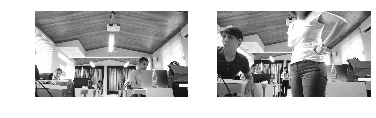

7079.86356192
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


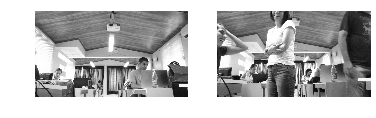

7084.98441406
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


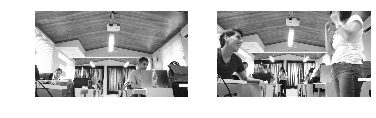

6136.02143904
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


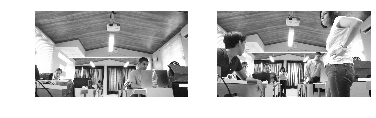

6544.4521875
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


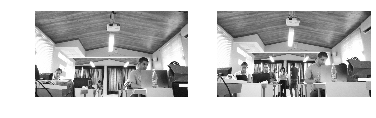

4914.65836179
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


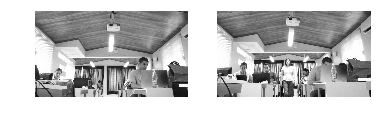

4981.56746576
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


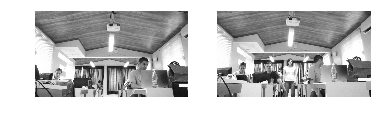

5049.61464747
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


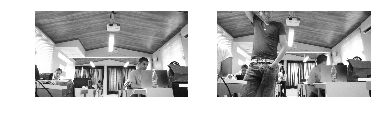

5268.49321132
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


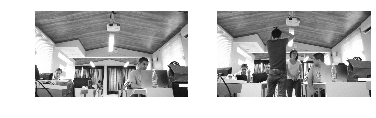

5263.20566792
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


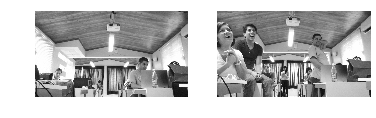

5813.13924142
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


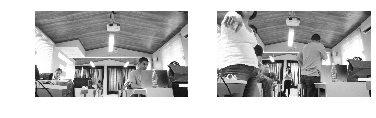

5699.73072531
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


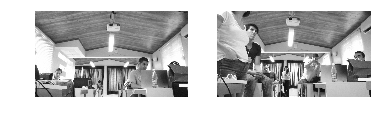

6533.80368152
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


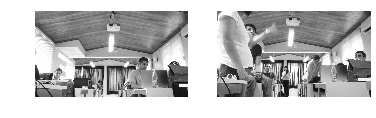

5757.15574363
hubo movimiento
V
Hubo movimiento
Hecho sin errores...


KeyboardInterrupt: 

In [8]:
%matplotlib inline
!adb forward tcp:9999 tcp:34972
import android
import matplotlib.pyplot as plt
import sys, os
import numpy as np
import cv2
import android
import json
import time
import random
#Importar sleep
from time import sleep
#Se crea la instancia del objeto android
droid=android.Android()
print "Start..."

droid = android.Android()
lastcheck = int(round(time.time() * 1000))
print lastcheck
vecino1 = droid.dialogGetInput('Detector', 'Introduce cual es el telefono del que esperas avisos, si eres el primer telefono en la linea de vigilancia deja la casilla vacia').result
vecino2 = droid.dialogGetInput('Detector', 'Introduce cual es el telefono al que vas a notificar').result
if not vecino1:
    modo = 'V' #Vigilante desde el principio detecta movimiento
else:
    modo = 'D' #Esta a la espera del sms para iniciar la detección
print modo
mensaje = "Move detected wake up..."
#-----------------------------------------------------------
#para telefonos motorola es la siguiente instrucción
#droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_original.jpg',1,1)
#para telefonos samsung es la siguiente instruccion
#droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_original.jpg',True)
#-----------------------------------------------------------

droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_original.jpg',1,1)

#se inicia el sensor especificamente de luz
droid.startSensingTimed(4,25)
droid.ttsSpeak("Empezando deteccion de luz")
counter = 0
counter2 = 0
counter3 = 0

def sendSMS():
    droid.smsSend(vecino2,mensaje)

def detectMove(counter,counter2,counter3):
    ##Codigo de detección de movimiento
    ##Debe devolver un booleano True o False
    while counter == 0:
        
        luz = droid.sensorsGetLight()
        infoIluminacion = " Iluminacion: %s" %luz[1]
        #print infoIluminacion
        #se pone el valor del rango de luz que existe sin movimiento
        if luz[1]<28:
            droid.ttsSpeak("Hubo movimiento")
            print 'Hubo movimiento'
            counter+=1
            droid.stopSensing()

            droid.ttsSpeak('Tomando foto')

            while counter2 <= 5:
                droid.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_'+str(counter2)+'.jpg',1,1)
                counter2 +=1

            print 'Hecho sin errores...'

            droid.ttsSpeak('Terminado sin errores...')
            os.system('adb pull /sdcard/DCIM/CAMERA/SENSOR/ ./')

            droid.ttsSpeak('Empezando comparacion')
            #esta es la imagen original sin movimiento
            pic = os.path.join('.','foto_original.jpg')
            img = cv2.imread(pic, 0)

            while counter3 <= 5:

                #compara imagenes
                pic2 = os.path.join('.','foto_'+str(counter3) +'.jpg')
                img2 = cv2.imread(pic2, 0)

                compare_images(img,img2,'titulo')
                valor = mse(img,img2)
                if valor>1000 :
                    print 'hubo movimiento'
                    #droid.ttsSpeak('Comprobado hubo movimiento')
                    #counter3 +=5
                    return True
                counter3 +=1

            return False

def scanSMSs(lastcheck):
    #Detecta si recibe alguna notificacion
    msgs = droid.smsGetMessages(False, 'inbox')
    #print msgs[1]
    m = str(msgs[1])
    m = m.replace('\\','-').replace('"','<').replace("u'",'"').replace("'",'"')
    #print m
    d = json.loads(m)
    #print d
    count = 1
    startwatch = False
    for msg in d:
        #m = str(msg)
        #m = m.replace('"','<').replace("u'",'"').replace("'",'"')
        #d = json.loads(m)
        #print d
        if long(msg['date']) > lastcheck and msg['address'] == vecino1 and mensaje in str(msg['body']):
            print "Start watch..."
            startwatch = True
            lastcheck = int(round(time.time() * 1000))
            droid.smsDeleteMessage(msg['_id'])
            break;
        count += 1
    print count
    if not startwatch:
        print "Go to sleep"
    return startwatch

    
counterdetect = 0
while(True):
    if modo == 'V':
        if detectMove(counter,counter2,counter3):
            sendSMS()
            #break
            time.sleep(10)
            counterdetect = 0
        else:
            counterdetect += 1
    else:
        if scanSMSs(lastcheck):
            modo = 'V'
            counterdetect = 0
            
    if counterdetect > 10 and vecino1:
        modo = 'D'
    print modo
    time.sleep(1)
print "program finish"

# Para Comparar las imagenes

Se utiliza el siguiente código para la comparación de las imagenes una vez que estan en el equipo. Éste hay que ejecutarlo antes de empezar la detección de movimiento.

In [3]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
   	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	print m
    
    